# Clusters Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load data

In [2]:
df = pd.read_csv('jewellery.csv')

In [3]:
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [6]:
df.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


### data Viz

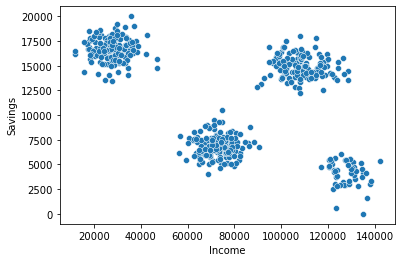

In [8]:
sns.scatterplot(data = df, x = 'Income', y = 'Savings' );

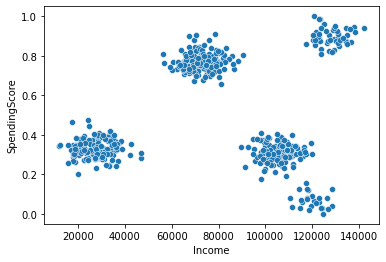

In [9]:
sns.scatterplot(data = df, x = 'Income', y = 'SpendingScore' );

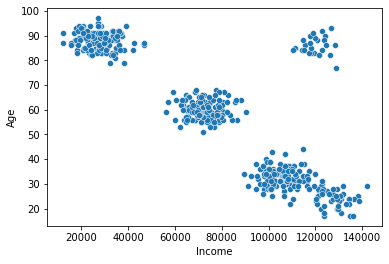

In [10]:
sns.scatterplot(data = df, x = 'Income', y = 'Age' );

## Cluster Analysis 

In [11]:
from sklearn.cluster import KMeans

In [12]:
df.columns

Index(['Age', 'Income', 'SpendingScore', 'Savings'], dtype='object')

In [15]:
X = df[['Age', 'Income', 'SpendingScore']]

In [16]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [17]:
pred = model.predict(X)

In [18]:
df['cluster'] = pred

In [19]:
df.head()

,Age,Income,SpendingScore,Savings,cluster
0,58,77769,0.791329,6559.829923,3
1,59,81799,0.791082,5417.661426,3
2,62,74751,0.702657,9258.992965,3
3,59,74373,0.765680,7346.334504,3
4,87,17760,0.348778,16869.507130,0


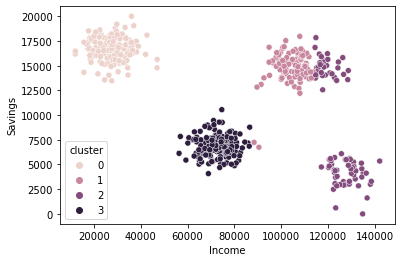

In [20]:
sns.scatterplot(data = df, x = 'Income', y = 'Savings', hue = 'cluster' );

## Elbow method

In [25]:
scores = []
k_range = range(1,10)
for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(X)
    scores.append(model.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [26]:
scores

[652927479197.9862,
 179959163339.8591,
 38579759281.97895,
 18829829560.271847,
 14941485350.90068,
 11187443478.930696,
 8097235410.614929,
 6252715251.147818,
 5020645799.078177]

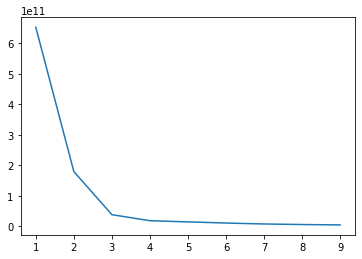

In [27]:
plt.plot(k_range, scores)
plt.show()

#### comment:
the optimal k = is 3 and 4 

### Elbow Method with yellow bircks

In [28]:
from yellowbrick.cluster import KElbowVisualizer

In [32]:
model = KMeans()
vis = KElbowVisualizer(model, k=(1,10))

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


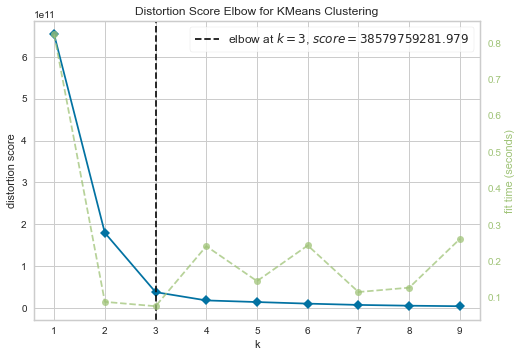

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
vis.fit(X)
vis.show()

#### Commet :
the optimal cluster are 3